<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
!pip install pyupbit

In [95]:
import pyupbit

In [96]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-hbar", interval="minute240")
df

,open,high,low,close,volume,value
2021-10-21 21:00:00,356.0,361.0,350.0,355.0,8.211362e+06,2.921766e+09
2021-10-22 01:00:00,354.0,364.0,354.0,359.0,2.142193e+06,7.701047e+08
2021-10-22 05:00:00,359.0,359.0,352.0,353.0,2.121329e+06,7.529282e+08
2021-10-22 09:00:00,353.0,361.0,352.0,359.0,7.328980e+06,2.601116e+09
2021-10-22 13:00:00,359.0,374.0,354.0,363.0,3.819150e+07,1.398304e+10
...,...,...,...,...,...,...
2021-11-23 09:00:00,1000.0,1005.0,953.0,964.0,2.815410e+07,2.745557e+10
2021-11-23 13:00:00,964.0,975.0,955.0,957.0,1.549951e+07,1.494436e+10
2021-11-23 17:00:00,957.0,979.0,932.0,960.0,2.707840e+07,2.588643e+10
2021-11-23 21:00:00,959.0,964.0,947.0,952.0,1.360686e+07,1.298598e+10


In [97]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2021-10-21 21:00:00,355.0
1,2021-10-22 01:00:00,359.0
2,2021-10-22 05:00:00,353.0
3,2021-10-22 09:00:00,359.0
4,2021-10-22 13:00:00,363.0
...,...,...
195,2021-11-23 09:00:00,964.0
196,2021-11-23 13:00:00,957.0
197,2021-11-23 17:00:00,960.0
198,2021-11-23 21:00:00,952.0


In [98]:
#prophet 불러옴
from fbprophet import Prophet

In [99]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [100]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=100, freq='H')
forecast = model.predict(future)

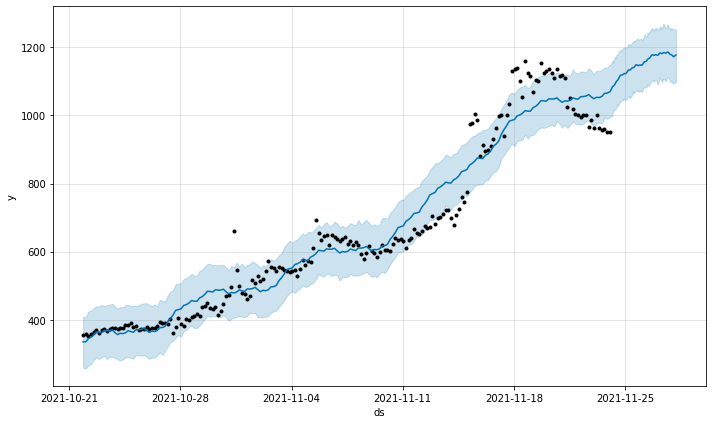

In [101]:
#그래프1
fig1 = model.plot(forecast)

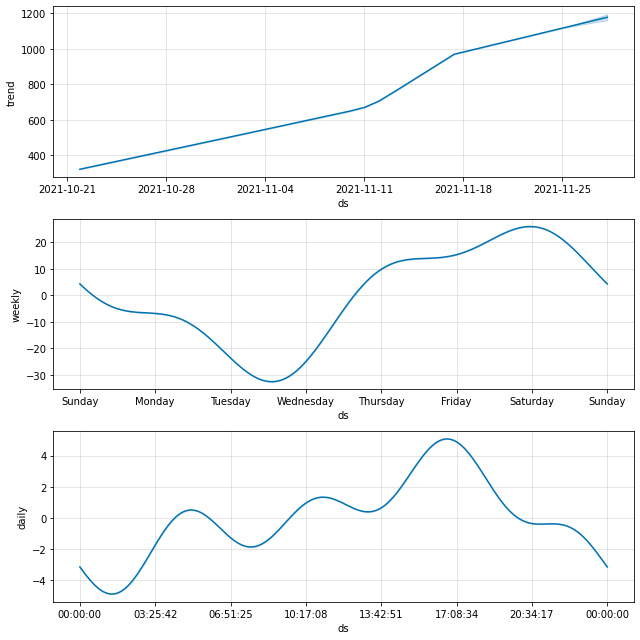

In [102]:
#그래프2
fig2 = model.plot_components(forecast)